# Section 1: Introduction to Data Visualization and Distributions

This notebook introduces you to Data Visualization and Distributions.

---
## Introduction to Data Visualization

Looking at the numbers and characters at a final dataset is rarely useful. To convince ourselves, let's try to learn something from the US murders dataset. 

In [1]:
install.packages("dslabs")
library(dslabs)
data(murders)
head(murders)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


state,abb,region,population,total
Alabama,AL,South,4779736,135
Alaska,AK,West,710231,19
Arizona,AZ,West,6392017,232
Arkansas,AR,South,2915918,93
California,CA,West,37253956,1257
Colorado,CO,West,5029196,65


### Data Visualization

How quickly can we determine which state has the largest population? Or which state has the smallest one? Is there a relationship between population size and the total murders? How do the murder rates vary accross regions of the country?

It is very difficult to extract this informations just from looking at the numbers. In contrast, the answer to all these questions are readily from examining the right plot. Remember: __a picture is worth a thousand words__.

Data visualization provides a powerful way to communicate a data driven finding, and in some cases the visualization is so convincing that no follow up analysis is required. It is the strongest tool of what we call _exploratory data analysis (EDA)_.

John Tuckey, the father of exploratory data analysis, once said: "the gratest value of a picture is when it forces us to see what we never expected to see".

### Distributions

Numerical data is often summarized with an __average__ value. Ocassionally, a second number is reported: the __standard deviation__. An entire vector of numbers can be summarized with just these two numbers, and in some cases they are all we need to understand the data.

Data visualization will help us determine when this two-number summary are appopriate, and its techniques will serve as alternative when they are not. Our first data visualization building block is learning to summarize lists of factors or numeric vectors.

The most basic statistical summary of a list of objects or numbers is its __distribution__. Once a vector has been summarized as a distribution, there are several data visualization tchniques to effectively relay this information.

### Data Types

An important first step in deciding how to visualizar data is to know what type of data it is. We'll be working with two kind of varibles:

- __categorical:__ can be divided into _ordinals_ and _non-ordinals_.
- __numerical:__ can be divided into _discrete_ and _continuous_.

Categorical data are those that can be defined by a small number of groups: sex (male, female), regions (Northeast, South, Central, West), size (small, medium, large), spiceness(mild, medium, hot), etc. Some of them can be ordered, such as size and spiceness. Note that data can be ordered even if they are not number per se.

Numerical data are, as the name suggests, numbers: population size, total number of munders, height, murder rate, etc. Discrete variables have to be round numbers (such as population size and number of murders), while continuous variables are those that can take any value if measured with enough precision (like height and murder rate).

---
## Introduction to Distributions

To begin our introdution to distributions, we'll load the heights dataset from dslabs:

In [2]:
data(heights)
head(heights)

sex,height
Male,75
Male,70
Male,68
Male,74
Male,61
Female,65


### Frequency Table
As said earlier, the most basic statistical summary of a list is its distribution: a compact description of a list with many elements. For example, the sex represented in the heights dataset can be summarized by the proportions of each of the two categories, male and female:

In [3]:
prop.table(table(heights$sex))


   Female      Male 
0.2266667 0.7733333 

This two category _frequency table_ is the simplest form of a distribution we can form, but we don't really need to visualize it since one number describes everythng we need to know about this dataset: 22.6% are females and the rest are males. That's all we need to know.

### Bar Plot
When there are more categories, then a simple bar plot describe the distribution. The example below shows the proportions of state regions for the 50 states, plus DC, in the murders dataset (don't worry about the code, we'll understand it later):


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



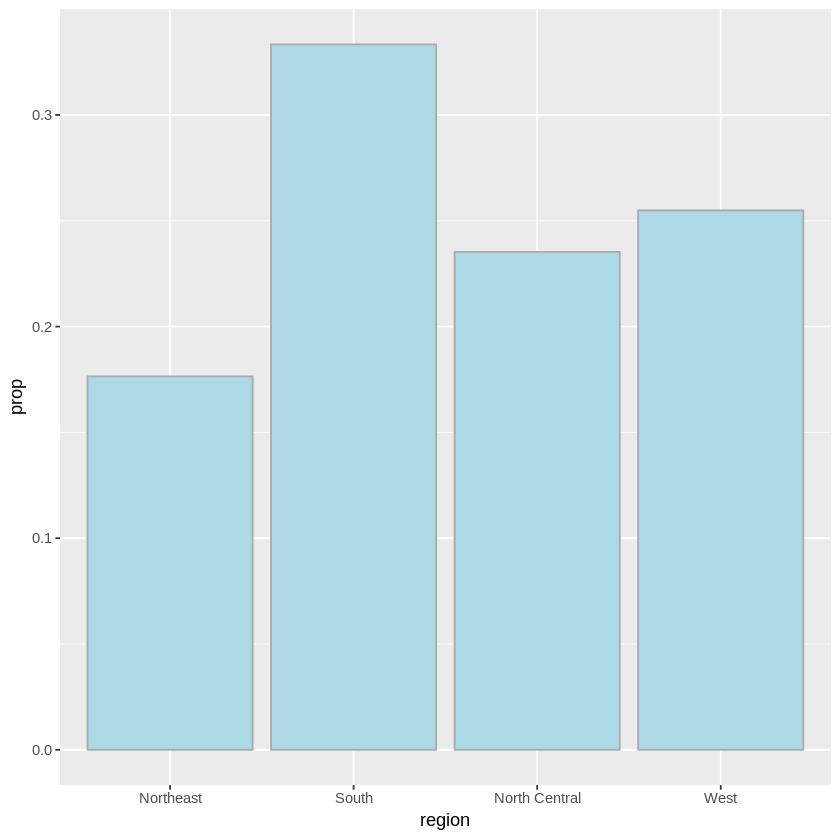

In [4]:
library(dplyr)
library(ggplot2)
data(murders)
murders %>% ggplot(aes(x=region, y=..prop.., group=1)) + geom_bar(color='darkgrey', fill='lightblue')

We can see in the plot above that the height of the bar tells us the proportion of states in each of the four regions. Although this particular plot (a graphical representation of a frequency table) does not provide much more insights than a table itself, it is a first example of how we convert a vector into a visualization that succintly summarizes all the information in that vector.

### Cumulative Distribution Function and Empirical Cumulative Distribution Function
When the data is numerical, this task is much more challenging. When data is not categorical, reporting the frequency of each unique entry is not an effective summary, since most entries are unique. A more useful way to define a function that reports the proportion of the data below a value _N_ for all possible values of _N_. This function is called a __cumulative distribution function (CDF)__. In statistical textbooks, the following mathematical notation is used: $F(a) = Pr(x\leqslant(a))$.

CDFs can be determined mathematically, with no data. When data is used to calculate the proportions, we have instead an __emprical cumulative distribution function (ECDF)__.

The example below shows us a plot of the ECDF for the height variable in heights dataset:

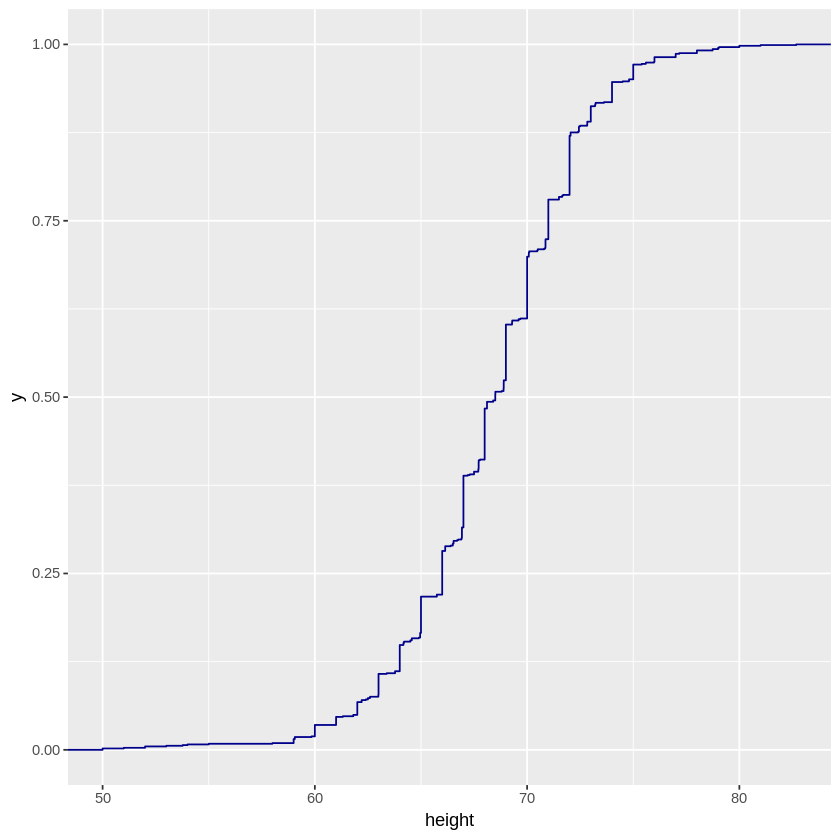

In [5]:
data(heights)
heights %>% ggplot(aes(x=height)) + stat_ecdf(color='darkblue')

From the plot, we can see that around 14% of the students in the dataset have heights below 66, and that around 84% of them have heights below 72 inches. We can even conclude that 70% of the students have heights between 66 and 72 inches (84% - 14%).

### Histograms
Although the CDF and ECDF provide all the information we need and it is widely discussed in statistics textbooks, the plot is actually not very popular in practice. That's why it does not easily convey characteristics of interest, like in what value is the distribution centered, or if the distribution is symmetric, or what range contains 95% of the data, etc. We can decioher all this from the plot, but it's not that easy.

Histograms are mugh preferred because they gratly facilitate answering such questions. Although they sacrfice a bit of information, they are much easier to interpret. Observe:

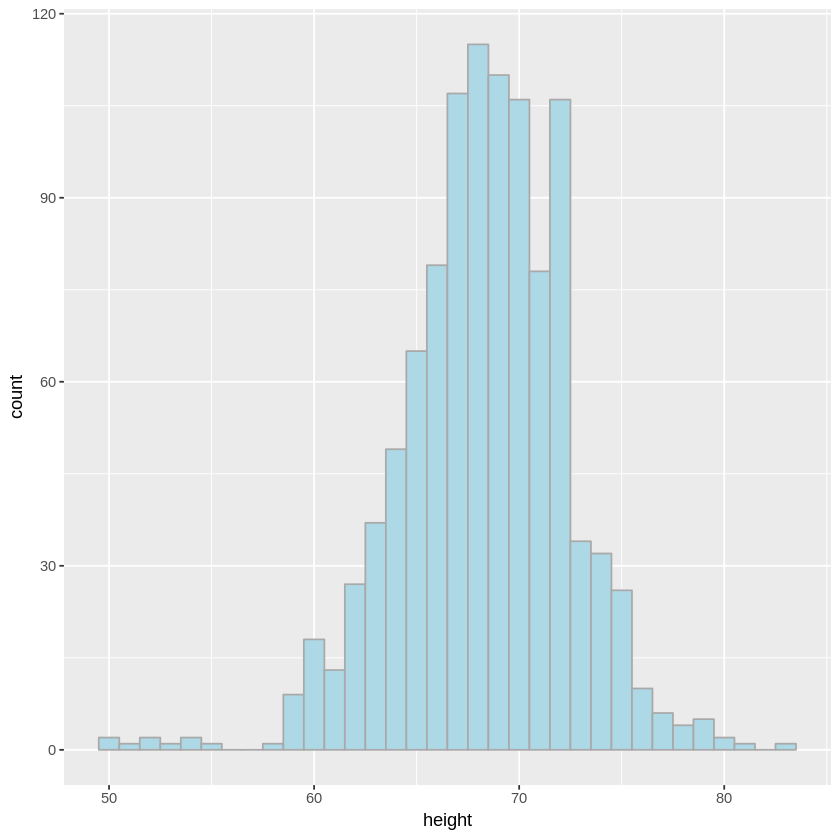

In [6]:
heights %>% ggplot(aes(x=height)) + geom_histogram(binwidth=1, color='darkgrey', fill='lightblue')

From the plot, we can see that heights are centered around 69 inches, that they are slightly symmetric, and that most of them are between 63 and 75 inches. We can also see that its range is from 50 to 84, and if we add up counts, we can obtain very good approximations of the data in any interval. So it provides almost all the information of the ECDF.

Note that we lose some information because bins consider, for example, heights between 59.5 and 50.5 inches the same thing. ECDF doesn't have this issue. In this case, because this difference are almost unnoticeable to the eye, the practical implications are negligible.

### Smooth Density Plots
Smooth density plots are similar to histograms, but are aesthetically more appealing. The next code cell produces a smooth density plot based on the heights dataset (males filtered):

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



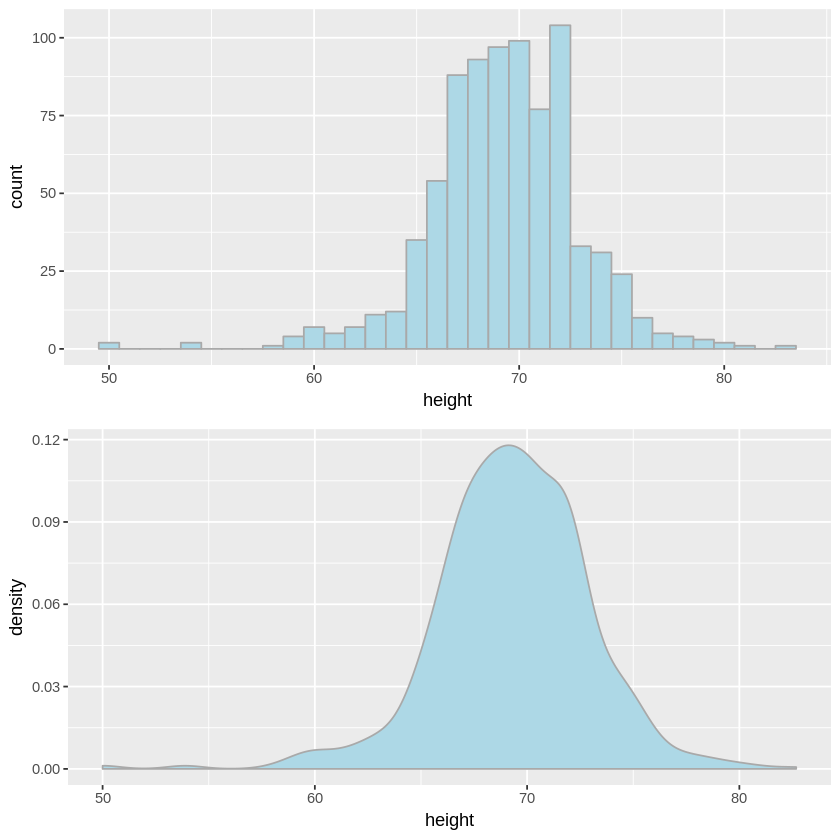

In [7]:
plot <- heights %>% filter(sex=='Male') %>% ggplot(aes(x=height))
histogram <- plot + geom_histogram(binwidth=1, color='darkgrey', fill='lightblue')
smooth_density_plot <- plot + geom_density(color='darkgrey', fill='lightblue')
install.packages("gridExtra")
library(gridExtra)
grid.arrange(histogram, smooth_density_plot, nrow=2)

Note that smooth density plot doesn't have sharp edges at the interval boundaries and that many of the local peaks in the histograms are not in the density plot. Also note that the y-axis scale changed from count to density.

To understand the smooth densities, we have to understand estimates, a topic we don't cover until later. However, we provide a heuristic explanation to help you understand the basics. The main new concept we have to understand is that we assume that our list of observed values comes from a much, much larger list of unobserved values. Because we assume we have many more values in our list, we can make a histogram with very, very small bins. This idea will help us understand what smooth densities are: if we accept this idea, consecutive bins will be similar. This is what we mean bby smooth: we don't have big jumps from bin to bin.

Observe what happens when we change the bin size:

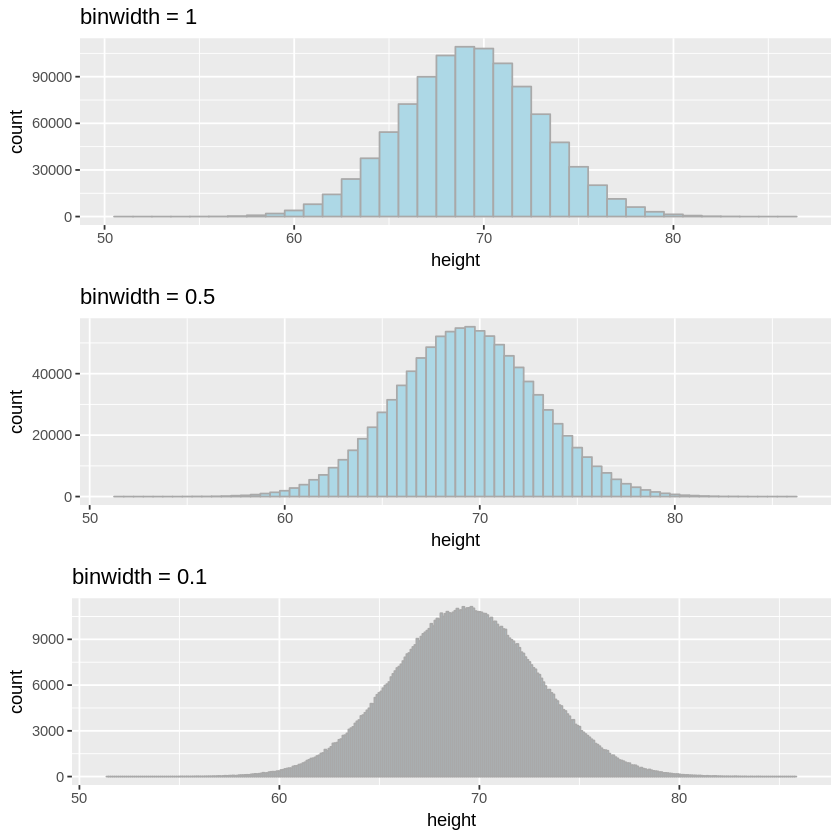

In [8]:
male_heights <- heights %>% filter(sex=='Male')
mean_male_heights <- mean(male_heights$height)
stdev_male_heights <- sd(male_heights$height)
hypothetical_heights <- data.frame(height=rnorm(10^6, mean=mean_male_heights, sd=stdev_male_heights))
plot <- hypothetical_heights %>% ggplot(aes(x=height))
hist_1 <- plot + geom_histogram(binwidth=1, color='darkgrey', fill='lightblue') + ggtitle('binwidth = 1')
hist_2 <- plot + geom_histogram(binwidth=0.5, color='darkgrey', fill='lightblue') + ggtitle('binwidth = 0.5')
hist_3 <- plot + geom_histogram(binwidth=0.1, color='darkgrey', fill='lightblue') + ggtitle('binwidth = 0.1')
grid.arrange(hist_1, hist_2, hist_3, nrow=3)

We can see that the edges start disappearing and the histogram becomes smoother. In this hypothetical situation, the smooth density is basically the top of the histogram bars when the bins are very small. To make the curve not depend on the hypothetical size of the list of numbers, we can compute the curve on the frequency scale rather than the count scale.

Note that smooth is a relative term. We can actually control the smoothness of the curve that define the smooth density through the _adjust_ argument in the geom_density function:

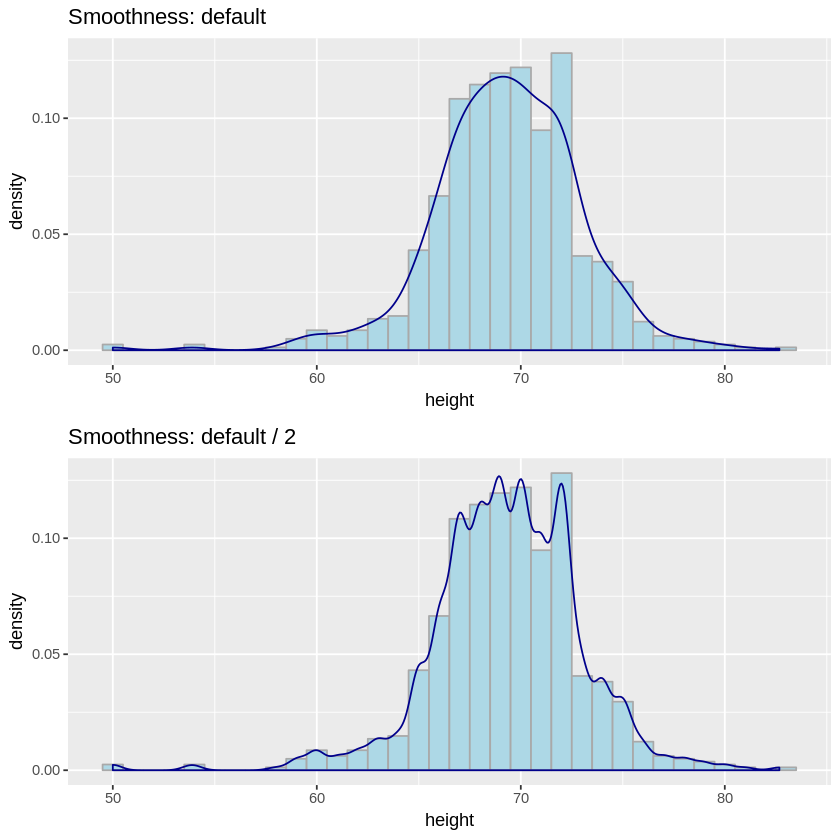

In [9]:
plot <- heights %>% filter(sex=='Male') %>% ggplot(aes(x=height))
histogram <- plot + geom_histogram(binwidth=1, color='darkgrey', fill='lightblue', aes(y=..density..))
p1 <- histogram + geom_density(color='darkblue', adjust=1) + ggtitle('Smoothness: default')
p2 <- histogram + geom_density(color='darkblue', adjust=0.5) + ggtitle('Smoothness: default / 2')
grid.arrange(p1, p2, nrow=2)

The plots above show us the difference it makes when modifying to degree of smoothness. The first curve goes up and than goes down smoothly; the second curve is more jagged, it goes up and down quickly. Choosing the right degree of smoothness is very important, since the resulting visualization can change our interpretation of the data.

Take as example the plots above. It represents heights of men, and we do have reasons to believe that the proportion of men with similar heights should be about the same. For example: the proportion of men with 72 inches should be more similar to the proportion of men with 71 than the proportion of men with 68 inches. This implies that the curve should be pretty smooth, such as the first one.

Always keep in mind that, while the histogram is an assumption free summary, the smooth density is based in assumptions and choices that we make as data analysts.

The last thing we have to understand about smooth density plots is the units of the y-axis:

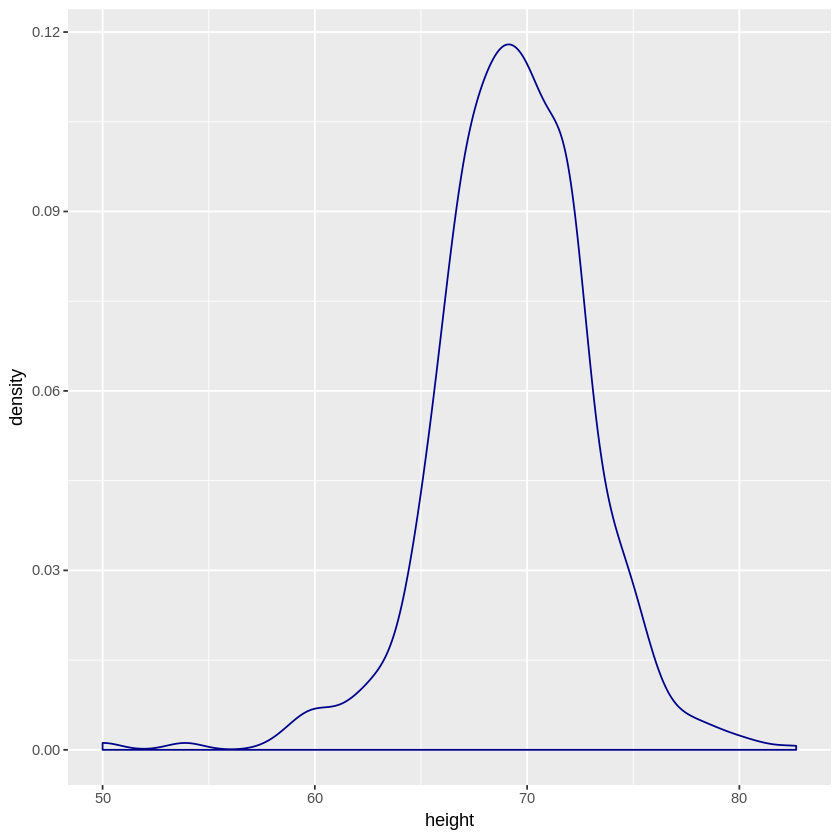

In [10]:
heights %>% filter(sex=='Male') %>% ggplot(aes(x=height)) + geom_density(color='darkblue')

It is not straightforward. It is scaled up so that the area under the density curve adds up to 1.It means that if we form a bin with a base that is 1 unit long, the y-axis value tells us the proportion of values in that bin. But this is only true if the bin size is 1.

For other size intervals, the best way to determine the proportion of data in that interval is by calculating the proportion of the total area contained in that interval. For example, if we take the proportion of values between 65 and 68, it'll be equal the proportion of the graph that is in the blue region that we show below:

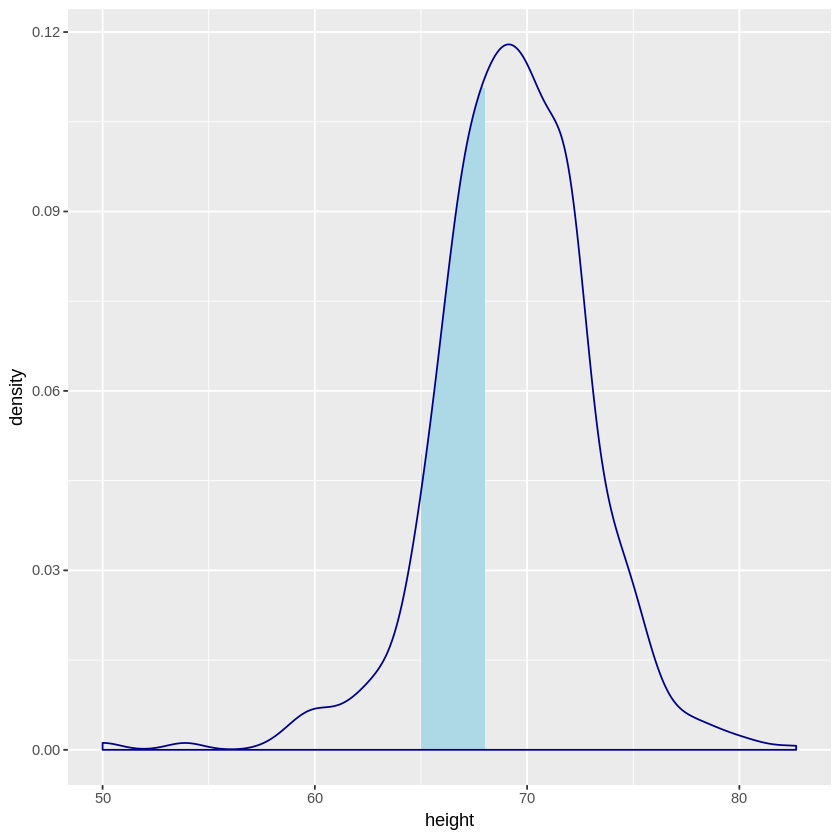

In [11]:
male_heights <- heights %>% filter(sex=='Male')
min_height <- 65
max_height <- 68

density = density(male_heights$height)
density_dataframe <- data.frame(x=density$x, y=density$y)

y_min_height <- density_dataframe$y[round(density_dataframe$x) == min_height]
y_max_height <- density_dataframe$y[round(density_dataframe$x) == max_height]

shade <- rbind(data.frame(x=min_height, y=0),
               data.frame(x=min_height, y=y_min_height),
               density_dataframe[density_dataframe$x > min_height & density_dataframe$x < max_height, ], 
               data.frame(x=max_height, y=y_max_height), 
               data.frame(x=max_height, y=0))

male_heights %>% ggplot(aes(x=height)) + 
    geom_polygon(data=shade, fill='lightblue', aes(x, y)) + 
    geom_density(color='darkblue') +
    ylab('density')

The proportion of the blue area is 0.31, which means that about 31% of our values are between 65 and 68.

As a final note, it's important to say that an advantage of smooth density over histogram is that it makes it easier to compare two distributions. This is in large part because the jagged edges of the histogram add cluter, so when we're comparing two histograms it makes it a little it hard to see. Observe the example below:

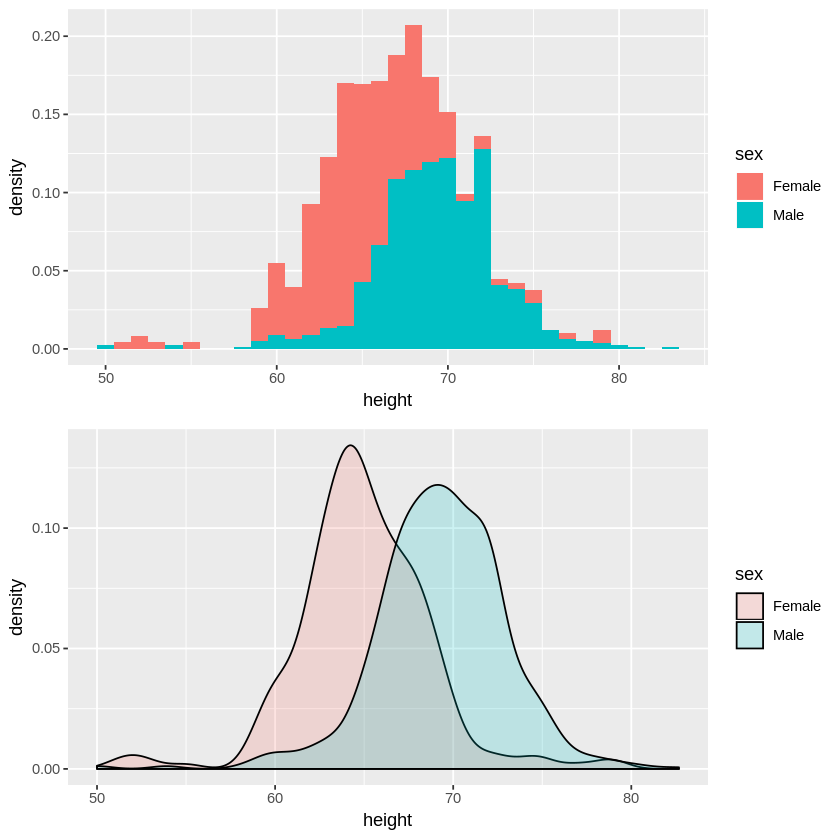

In [12]:
plot <- heights %>% ggplot(aes(x=height, fill=sex))
histograms <- plot + geom_histogram(binwidth=1, aes(y=..density..))
densities <- plot + geom_density(alpha=0.2)
grid.arrange(histograms, densities, nrow=2)

### Normal Distribution

We often see the average and the standard deviation used as a smmary statistic for a list of numbers, atwo number summary. To understand what these summaries are and why they are so widely used, we need to understand the normal distribution.

The normal distribution, also known as the bell curve and as the Gaussian distribution, is one of the most famous mathematical concepts in history. A reason for this is that approximately normal distributions occur in many situations. There are explanations for this, but we explain it later. Here we will focus on how the bell curve helps us summarize data.

Rather than using data, the normal distribution is defined with a mathematical formula. For any interval $a$ and $b$, the proportion of values in the interval can be computed using $Pr(a < x < b) = \int_ {a} ^ b \frac {1} {\sqrt{2\pi}s} e ^ {- \frac {1} {2} (\frac {x - m} {s}) ^ 2} dx$.

We don't need to memorize or understand the details of the formula, since R computes it for us, but it is important to note that it is completely defined by just to parameters: $m$ (mean) and $s$ (standard deviation). The rest of the symbols in the formula represents the interval ends ($a$ and $b$) and known mathematical constants ($\pi$ and $e$).

The distribution is symmetric, centered at the average, and most of the values (about 95%), are within two standard deviations from the average. Here's what the distribution looks like when the average is zero and the standard deviation is one:

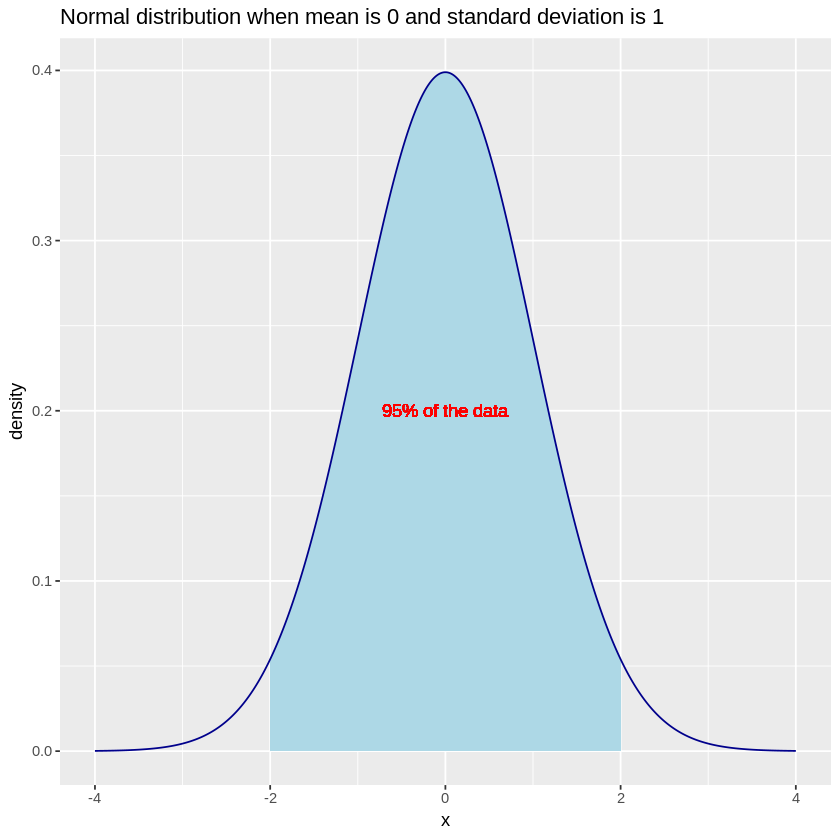

In [13]:
x <- seq(-4, 4, 0.01)
y <- dnorm(x, 0, 1)
data <- data.frame(x=x, y=y)

min_height <- -2
max_height <- 2

y_min_height <- data$y[round(data$x, 2) == min_height]
y_max_height <- data$y[round(data$x, 2) == max_height]

shade <- rbind(data.frame(x=min_height, y=0),
               data.frame(x=min_height, y=y_min_height),
               data[data$x > min_height & data$x < max_height, ], 
               data.frame(x=max_height, y=y_max_height), 
               data.frame(x=max_height, y=0))

data %>% ggplot(aes(x=x, y=y)) + geom_polygon(data=shade, fill='lightblue') + geom_line(color='darkblue') + 
    geom_text(label='95% of the data', x=0, y=0.2, color='red') + ylab('density') + 
    ggtitle('Normal distribution when mean is 0 and standard deviation is 1')

Knowing that normal distribution depends on the average and on the standard deviation of the data, we will now analyze the male heights smooth density and compare it with a normal distribution considering the average and the standard deviation of the male heights:

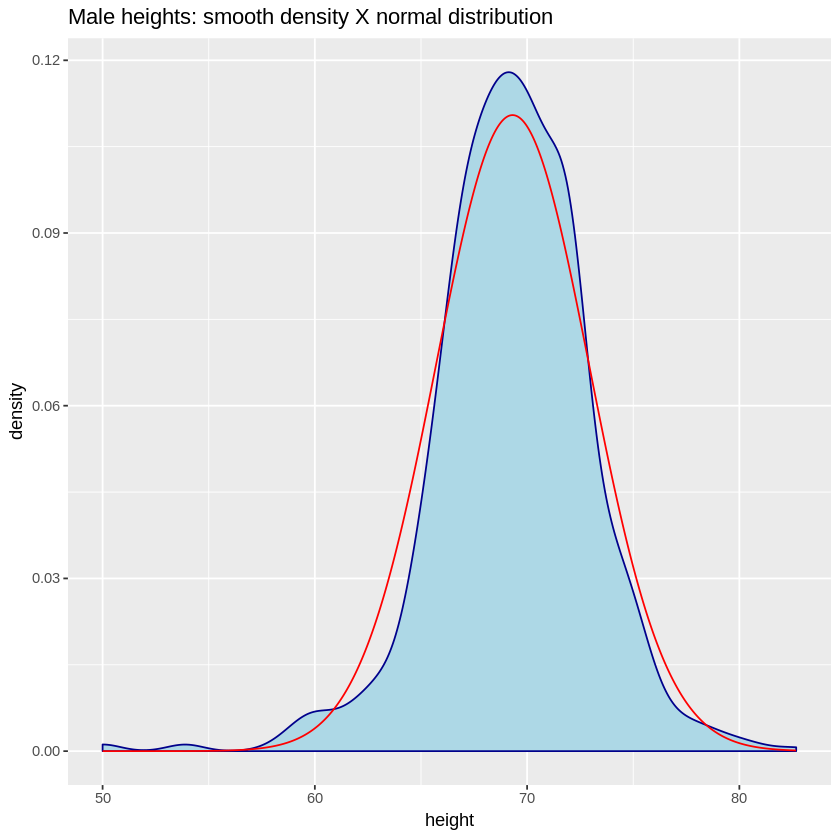

In [14]:
male_heights <- heights %>% filter(sex=='Male')

mean <- mean(male_heights$height)
sd <- sd(male_heights$height)

x <- seq(min(male_heights$height), max(male_heights$height), 0.01)
y <- dnorm(x, mean, sd)
normal_dist <- data.frame(x=x, y=y)

ggplot() + geom_density(aes(male_heights$height), color='darkblue', fill='lightblue') + 
    geom_line(aes(normal_dist$x, normal_dist$y), color='red') + xlab('height') + 
    ggtitle('Male heights: smooth density X normal distribution')

Note how close those two are. This tells us that the normal distribution approximates the distribution of our male heights.

Before we continue, it's important to understand the concept of __standard unit__. For data that is approximately normal, it is convenient to think in terms of standard units. The standard unit of a value tells us how many standard deviations away from the average that value is.

Specifically for a value $x$, we define the standard unit as $z(x) = \frac {x - m} {s}$, where $m$ is the mean and $s$ is the standard deviation. If we look back at the formula for the normal distribution, we notice that what is being exponentiated is negative $x$ squared. The maximum of $e ^ {-z ^ 2}$ is when $z = 0$, which explains why the maximum of the normal distribution is at the average. It also explais the simmetry, since $-z ^ 2$ is simmetryc around 0.

Standard units are useful because they tell us if a value is an outlier or not. If we convert normally distributed male heights into standard units, we can quickly know if:

- a person is about average height ($z = 0$)
- a person is tall ($z \geqslant 2$)
- a person is short ($z \leqslant -2$)
- a person is very tall ($z > 3$)
- a person is very short ($z < -3$)

Note that it does not matter what the original units are, these rules apply to any data that is approximately normal.

In R, we can quickly obtain standard units using the function _scale_. For example, to see the proportion of men that are within two standard deviations from the average, we can type:

In [15]:
male_heights <- heights %>% filter(sex=='Male')
z <- scale(male_heights$height)
mean(abs(z) < 2)

[1] 0.9495074

Note that, in the last line of the code cell above, _abs(z) < 2_ returns a list of booleans values, where TRUE is 1 and FALSE is 0. That's why we can use the function _mean_ to calculate the proportion we are looking for. Also note that, as predicted by the normal distribution, around 95% of the men in our dataset have heights within two standard deviations from the average.

To further confirm that in fact the approximation is a good one, we need to look at other intervals. For this, we use quantile plots.

---
## Quantile, Percentiles and Boxplots

In the previous sub-sections, we learned how we can have a very useful and short summary if a distribution is well approximated by the normal distribution. But to check if it is, in fact, a god approximation, there are other tools we can use.

### Quantile-Quantile Plots

Quantile-quantile plots, or q-q plots, help us to define if the normal distribution is a good approximation for a dataset. The first thing to do is define a series of proportion, for example: 0.05, 0.1, 0.15, up to 0.95. Once this is defined for each $p$, we determine the value $q$, so that the proportion of the values in the data below $q$ is $p$. The $q$ is referred to as the quantiles.

As a quick example, we can say that for the male heights dataset, 50% of the data is below 69.5 inches:

In [16]:
x <- heights %>% filter(sex=='Male') %>% .$height
mean(x<=69.5)

[1] 0.5147783

The output of the code cell above means that if $p = 0.5$, then the $q$ associated with that $p$ is 69.5. We can make this computation for a serie of p's, and if the quantiles for the data match the quantiles for the normal distribution, then it must be because the data is approximated by a normal distribution.

To obtain the quantiles for the data, we can use the _quantile_ function; to obtain the theoretical normal distribution quantile with the corresponding average and standard deviation, we can use the _qnorm_ function; and to see if they match or not, we can plot them against each other (using the _plot_ function), and then draw an identity line to see if the points fall on the line (using the _abline_ function:

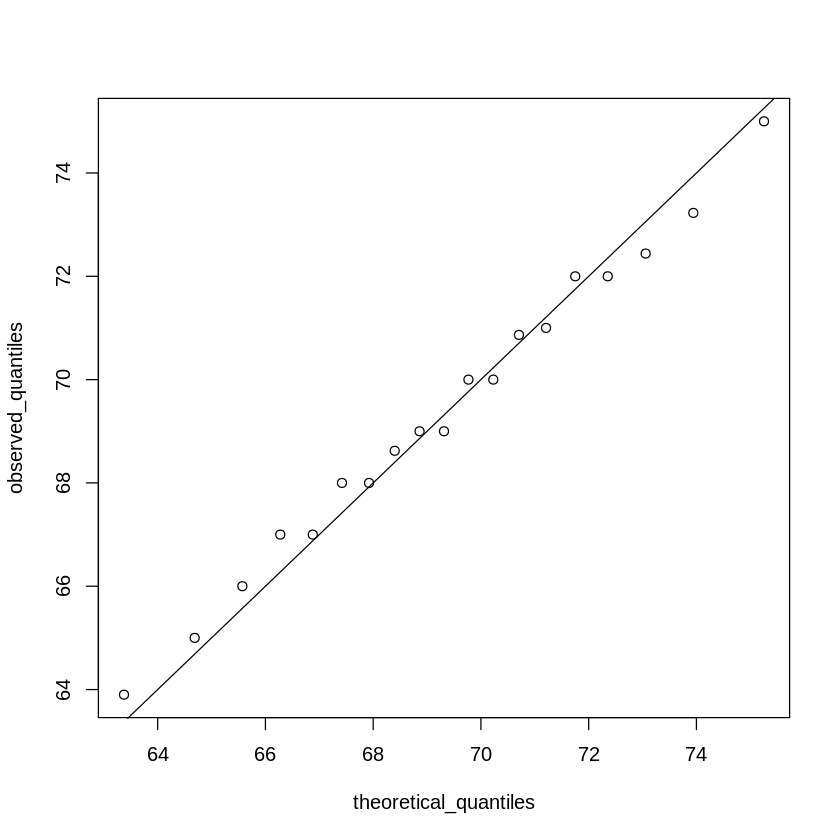

In [17]:
p <- seq(0.05, 0.95, 0.05)
observed_quantiles <- quantile(x, p)
theoretical_quantiles <- qnorm(p, mean=mean(x), sd=sd(x))
plot(theoretical_quantiles, observed_quantiles)
abline(0, 1)

The points fall almost on the identity line, meaning that the normal approximation is a pretty good approximation.

One final note: this code becomes slightly more simpler if we use standard units, because we won't need to define the mean and the standard deviation in the _qnorm_ function. We can calculate standard units using the _scale_ function, as we saw earlier:

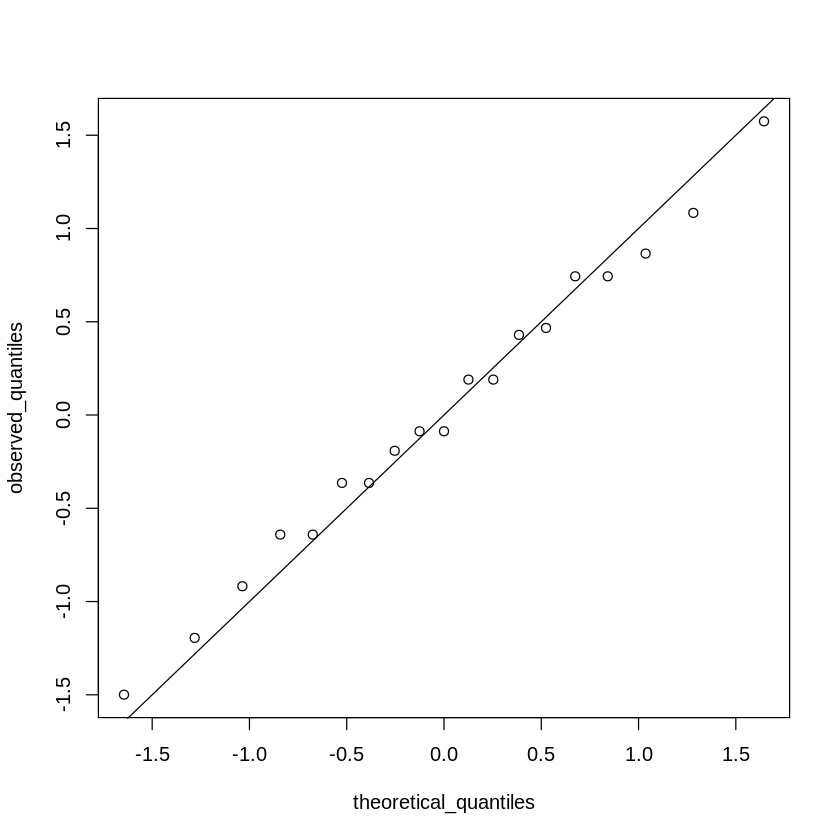

In [18]:
z <- scale(x)
observed_quantiles <- quantile(z, p)
theoretical_quantiles <- qnorm(p)
plot(theoretical_quantiles, observed_quantiles)
abline(0, 1)

Using the histogram, the density plots and the q'q plots, we have become convinced that the male height is well approximated with a normal distribution, with an average of 69.31 inches and a standard deviation of 3.61 inches.

In [20]:
mean(x)
sd(x)

[1] 69.31475

[1] 3.611024